In [1]:
# This data set will map obesity prevalence in the 18+ population of the City of Los Angeles.
# The data measures 2013-2014 percent of adult respondents who had a body mass index (BMI) of 30.0 or above.
# Data was collected at the zip code level by the California Health Interview Survey Neighborhood Edition.

In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as pltimport

import matplotlib.pyplot as plt

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [3]:
# To make the data format consistent and easiest to import, I converted the shapefile to a geojson format.
obese = gpd.read_file('data/ObeseLA.geojson')

In [4]:
heart = gpd.read_file('data/HeartLA.json')

In [5]:
streetsLA= gpd.read_file('data/Passed_LA_Slow_Streets.geojson')

In [6]:
# What are the fields within this data set?
list(obese)

['OBJECTID_1',
 'ZIPCODE',
 'Percent_',
 'LowerCL',
 'UpperCL',
 'Population',
 'Shape__Are',
 'Shape__Len',
 'geometry']

In [7]:
list(heart)

['OBJECTID',
 'ZIPCODE',
 'Percent_',
 'LowerCL',
 'UpperCL',
 'Population',
 'Shape__Are',
 'Shape__Len',
 'geometry']

In [8]:
list(streetsLA)

['Name', 'description', 'tessellate', 'geometry']

In [9]:
# What is the average statistics for obesity in City of LA zip codes?
obese['Percent_'].describe()

count    120.000000
mean      23.953333
std        7.639811
min       10.600000
25%       18.100000
50%       21.650000
75%       28.800000
max       40.100000
Name: Percent_, dtype: float64

In [10]:
# The average obesity prevalence rate within City of LA zip codes is about 24 percent of the 18+ population.
# The lowest prevalence rate is 10.6 percent, and the highest is 40.1 percent.

In [11]:
#W Which areas within the City have the highest prevalence of obesity?
obese_sorted = obese.sort_values(by='Percent_',ascending = False)

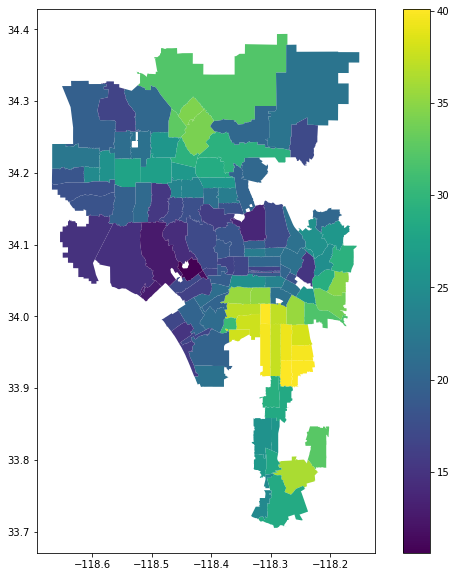

In [12]:
obese_sorted.head(1000).plot(figsize=(10,10),column='Percent_',legend=True)

In [13]:
# The data shows us that South/South Central LA has the highest prevalence of adult obesity, followed by the San Fernando Valley.

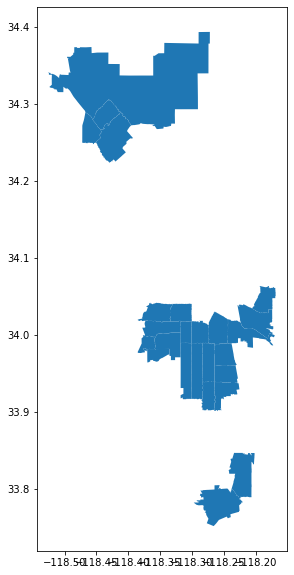

In [14]:
# Let's isolate which zip codes within the City have greater than 30% of respondents within obesity?
obese[obese['Percent_'] > 30].plot(figsize=(12,10))

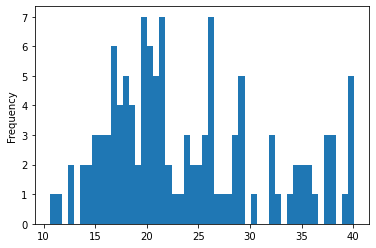

In [15]:
# What is the distribution of obesity rates in the data?
obese['Percent_'].plot.hist(bins=50)

In [16]:
# Most zip codes have an obesity rate of between ~17 to ~30 percent. 

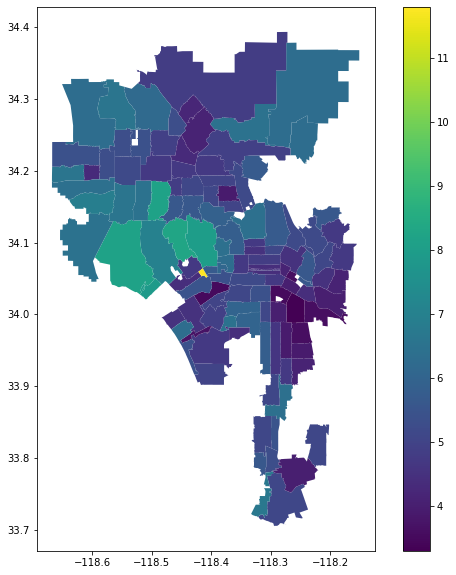

In [17]:
# What does heart disease prevalence look like in the City of LA?
heart.plot(figsize=(10,10),column='Percent_',legend=True)

In [18]:
# Only one zip code has a higher than average (outlier) prevalence of heart disease. The rest fall around 4 to 8 percent.

Text(0.5, 1.0, 'Prevalence of Heart Disease in Los Angeles')

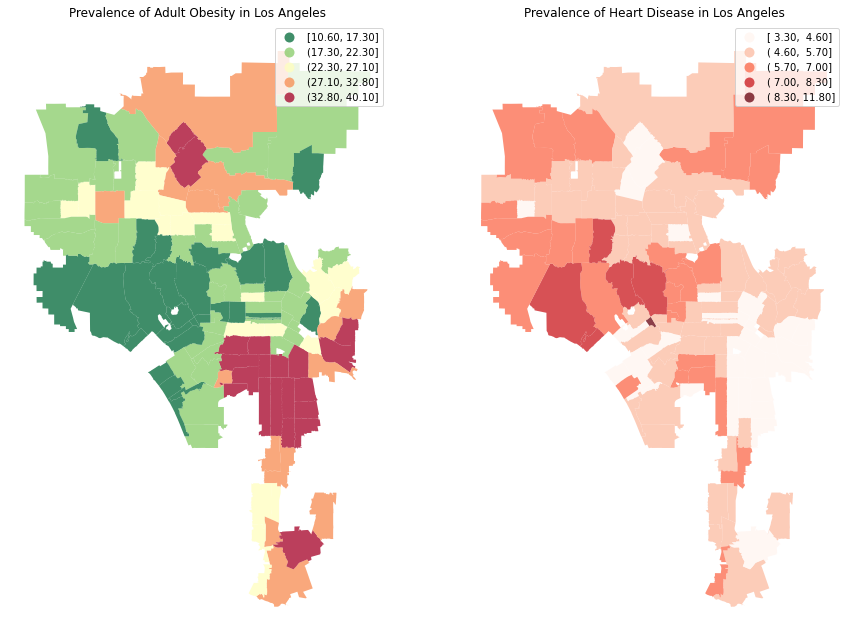

In [25]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs 

# regular count map on the left
obese.plot(column='Percent_', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Prevalence of Adult Obesity in Los Angeles")

# spatial lag map on the right
heart.plot(column='Percent_', 
            cmap='Reds', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
          )
           
ax2.axis("off")
ax2.set_title("Prevalence of Heart Disease in Los Angeles")
           


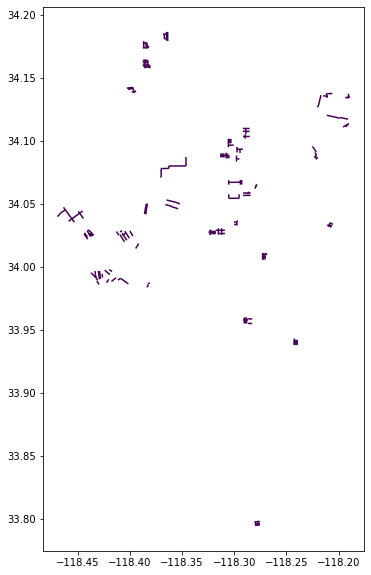

In [30]:
# How can we start to visualize the slow streets data?
streetsLA.plot(figsize=(10,10),column='tessellate',legend=False)

In [108]:
# Using Koreatown as an example, configure the place, network type, trip times, and travel speed
place = 'Koreatown, CA USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [109]:
%%time
# download the street network
G = ox.graph_from_place(place, network_type=network_type)

CPU times: user 3.39 s, sys: 17.4 ms, total: 3.4 s
Wall time: 1min 23s


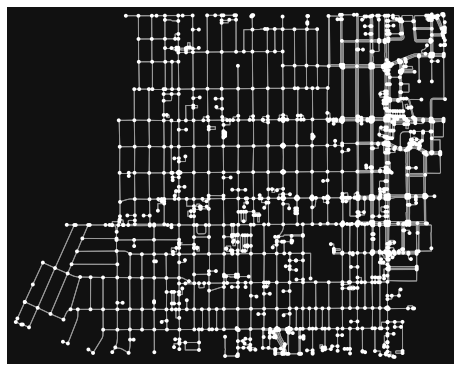

In [110]:
fig, ax = ox.plot_graph(G)

In [111]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

Text(0.5, 1.0, 'Slow Streets near Koreatown Koreatown, CA USA')

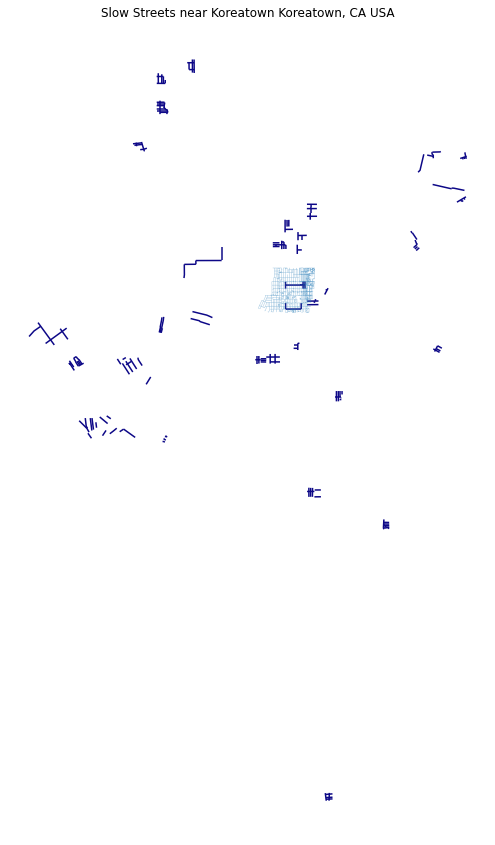

In [117]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
streetsLA.plot(alpha=1, 
                ax=ax, 
                column='tessellate', 
                cmap='plasma', 
                legend=False,
                zorder=10)

# add all nodes

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Slow Streets near Koreatown ' + place)

In [ ]:
# I think the biggest concern for me moving forward will be how to merge my various data sets together into one map.
# The scale appears off from the plot above.